In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


In [2]:
df = pd.read_csv("Open_Univ_Data_Final_merged.csv")
df.head()

,id_student,code_module,code_presentation,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,...,quiz,repeatactivity,resource,sharedsubpage,subpage,url,sum_click,days_interacted,daily_click,final_result
0,11391,AAA,2013J,M,East Anglian Region,HE Qualification,10.0,55<=,0,240,...,0.0,0.0,13.0,0.0,32.0,5.0,934,40,23.350000,Pass
1,28400,AAA,2013J,F,Scotland,HE Qualification,3.0,35-55,0,60,...,0.0,0.0,12.0,0.0,87.0,48.0,1435,80,17.937500,Pass
2,31604,AAA,2013J,F,South East Region,A Level or Equivalent,6.0,35-55,0,60,...,0.0,0.0,19.0,0.0,144.0,90.0,2158,123,17.544715,Pass
3,32885,AAA,2013J,F,West Midlands Region,Lower Than A Level,6.0,0-35,0,60,...,0.0,0.0,45.0,0.0,79.0,14.0,1034,70,14.771429,Pass
4,38053,AAA,2013J,M,Wales,A Level or Equivalent,9.0,35-55,0,60,...,0.0,0.0,11.0,0.0,91.0,45.0,2445,143,17.097902,Pass


In [3]:
df['final_result'].value_counts()

Pass           12356
Fail            5740
Withdrawn       4673
Distinction     3024
Name: final_result, dtype: int64

In [4]:
df.drop(df[df.final_result == 'Withdrawn'].index, inplace=True)

In [5]:
df['final_result'].value_counts()

Pass           12356
Fail            5740
Distinction     3024
Name: final_result, dtype: int64

In [6]:
df = df.replace(to_replace ="Distinction", value ="Pass")
df['final_result'].value_counts()

Pass    15380
Fail     5740
Name: final_result, dtype: int64

In [7]:
df['imd_band'].value_counts()

4.0     2287
3.0     2147
6.0     2112
2.0     2100
5.0     2077
8.0     1990
7.0     1946
9.0     1905
1.0     1888
10.0    1810
Name: imd_band, dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21120 entries, 0 to 25792
Data columns (total 44 columns):
id_student               21120 non-null int64
code_module              21120 non-null object
code_presentation        21120 non-null object
gender                   21120 non-null object
region                   21120 non-null object
highest_education        21120 non-null object
imd_band                 20262 non-null float64
age_band                 21120 non-null object
num_of_prev_attempts     21120 non-null int64
studied_credits          21120 non-null int64
disability               21120 non-null object
date_registration        21120 non-null float64
date_unregistration      2 non-null float64
date_registration_pos    21120 non-null float64
registration_before      0 non-null float64
mean_score               21117 non-null float64
CMA_score                12862 non-null float64
TMA_score                20611 non-null float64
Exam_score               4957 non-null float64
u

In [9]:
df.isnull().sum()

id_student                   0
code_module                  0
code_presentation            0
gender                       0
region                       0
highest_education            0
imd_band                   858
age_band                     0
num_of_prev_attempts         0
studied_credits              0
disability                   0
date_registration            0
date_unregistration      21118
date_registration_pos        0
registration_before      21120
mean_score                   3
CMA_score                 8258
TMA_score                  509
Exam_score               16163
unique                       0
dataplus                     0
dualpane                     0
externalquiz                 0
folder                       0
forumng                      0
glossary                     0
homepage                     0
htmlactivity                 0
oucollaborate                0
oucontent                    0
ouelluminate                 0
ouwiki                       0
page    

In [10]:
df.drop(columns=['id_student','date_unregistration', 'Exam_score','TMA_score','CMA_score','mean_score','registration_before','unique' ], inplace=True)
df = df.dropna()
df.isnull().sum()

code_module              0
code_presentation        0
gender                   0
region                   0
highest_education        0
imd_band                 0
age_band                 0
num_of_prev_attempts     0
studied_credits          0
disability               0
date_registration        0
date_registration_pos    0
dataplus                 0
dualpane                 0
externalquiz             0
folder                   0
forumng                  0
glossary                 0
homepage                 0
htmlactivity             0
oucollaborate            0
oucontent                0
ouelluminate             0
ouwiki                   0
page                     0
questionnaire            0
quiz                     0
repeatactivity           0
resource                 0
sharedsubpage            0
subpage                  0
url                      0
sum_click                0
days_interacted          0
daily_click              0
final_result             0
dtype: int64

In [11]:
train_cols = df.columns[0:-1]
train_cols 
label = df.columns[-1]
label

'final_result'

In [12]:
X = df[train_cols]
y = df[label].apply(lambda x: 1 if x == "Pass" else 0) #Turning response into 0 and 1


In [13]:
seed = 1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=seed)


In [14]:
X_enc = pd.get_dummies(X, prefix_sep='.')
feature_names = list(X_enc.columns)
X_train_enc, X_test_enc, y_train, y_test = train_test_split(X_enc, y, test_size=0.20, random_state=seed)

In [16]:
X_train_enc.head()

,imd_band,num_of_prev_attempts,studied_credits,date_registration,date_registration_pos,dataplus,dualpane,externalquiz,folder,forumng,...,highest_education.A Level or Equivalent,highest_education.HE Qualification,highest_education.Lower Than A Level,highest_education.No Formal quals,highest_education.Post Graduate Qualification,age_band.0-35,age_band.35-55,age_band.55<=,disability.N,disability.Y
25347,3.0,0,30,-114.0,114.0,0.0,0.0,0.0,0.0,38.0,...,1,0,0,0,0,1,0,0,1,0
25071,2.0,0,30,-15.0,15.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,1,0,0,1,0
4855,4.0,0,60,-22.0,22.0,0.0,0.0,0.0,0.0,1524.0,...,1,0,0,0,0,0,1,0,1,0
455,8.0,0,60,-20.0,20.0,0.0,0.0,0.0,0.0,34.0,...,1,0,0,0,0,0,1,0,1,0
5188,7.0,2,60,-141.0,141.0,0.0,0.0,0.0,0.0,54.0,...,0,0,1,0,0,1,0,0,1,0


In [17]:
feature_names

['imd_band',
 'num_of_prev_attempts',
 'studied_credits',
 'date_registration',
 'date_registration_pos',
 'dataplus',
 'dualpane',
 'externalquiz',
 'folder',
 'forumng',
 'glossary',
 'homepage',
 'htmlactivity',
 'oucollaborate',
 'oucontent',
 'ouelluminate',
 'ouwiki',
 'page',
 'questionnaire',
 'quiz',
 'repeatactivity',
 'resource',
 'sharedsubpage',
 'subpage',
 'url',
 'sum_click',
 'days_interacted',
 'daily_click',
 'code_module.AAA',
 'code_module.BBB',
 'code_module.CCC',
 'code_module.DDD',
 'code_module.EEE',
 'code_module.FFF',
 'code_module.GGG',
 'code_presentation.2013B',
 'code_presentation.2013J',
 'code_presentation.2014B',
 'code_presentation.2014J',
 'gender.F',
 'gender.M',
 'region.East Anglian Region',
 'region.East Midlands Region',
 'region.Ireland',
 'region.London Region',
 'region.North Region',
 'region.North Western Region',
 'region.Scotland',
 'region.South East Region',
 'region.South Region',
 'region.South West Region',
 'region.Wales',
 'region.

In [18]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train_enc)
X_train_std = sc.transform(X_train_enc)
X_test_std = sc.transform(X_test_enc)

C:\Users\bolla.kumar\AppData\Local\Continuum\anaconda3\envs\IML\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\bolla.kumar\AppData\Local\Continuum\anaconda3\envs\IML\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  """
C:\Users\bolla.kumar\AppData\Local\Continuum\anaconda3\envs\IML\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  


In [20]:
from sklearn.linear_model import LogisticRegression
LR =LogisticRegression()


In [21]:
LR.fit(X_train_std, y_train)
LR.score(X_test_std, y_test)

C:\Users\bolla.kumar\AppData\Local\Continuum\anaconda3\envs\IML\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.84159881569208

In [24]:
y_predict = LR.predict(X_test_std)


In [25]:
y_predict

array([0, 1, 0, ..., 0, 1, 1], dtype=int64)

In [26]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_predict)

array([[ 683,  460],
       [ 182, 2728]], dtype=int64)

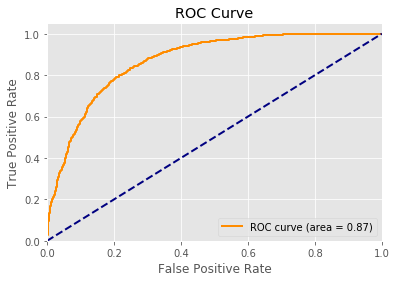

In [28]:
# code taken from heer http://benalexkeen.com/scoring-classifier-models-using-scikit-learn/
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

y_predict_probabilities = LR.predict_proba(X_test_std)[:,1]

fpr, tpr, _ = roc_curve(y_test, y_predict_probabilities)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()